In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

from xmeans import XMeans

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
def visualize(data, labels, model):
    fig = plt.figure(figsize=(6,6), dpi=80)
    plt.scatter(data[:, 0], data[:, 1], s=20, c=labels, cmap='viridis')
    plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=50, c='red')
    plt.grid()
    plt.show()

## 2-dimenisonal cases

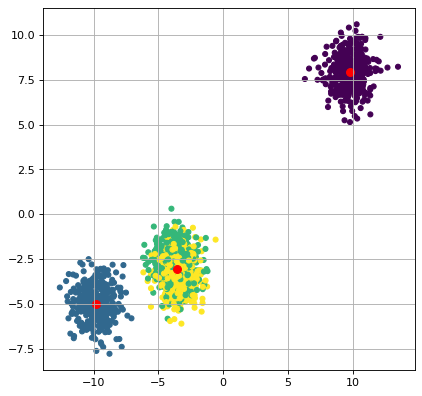

blobs dataset with shape: (1500, 2)
True K                  : 4
Estimated K             : 3
Silhouette score        : 0.7787046459944714
Random Index score      : 0.7138766940255774
Completeness score      : 1.0
Mutual Information score: 0.8569063315982649


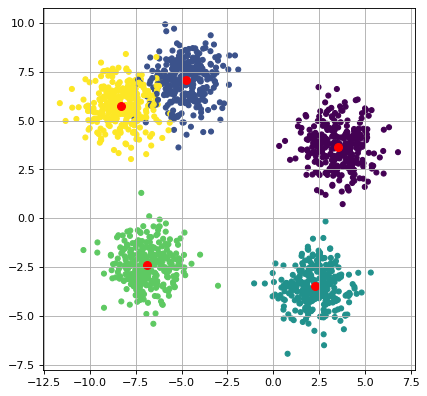

blobs dataset with shape: (1500, 2)
True K                  : 5
Estimated K             : 5
Silhouette score        : 0.6707643912202406
Random Index score      : 0.9645835073226303
Completeness score      : 0.9609689039826408
Mutual Information score: 0.9608359432819287


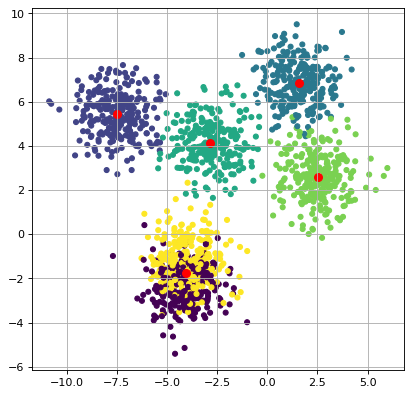

blobs dataset with shape: (1500, 2)
True K                  : 6
Estimated K             : 5
Silhouette score        : 0.6189270206956442
Random Index score      : 0.8066535441579287
Completeness score      : 0.9688056902242709
Mutual Information score: 0.9020619104394192


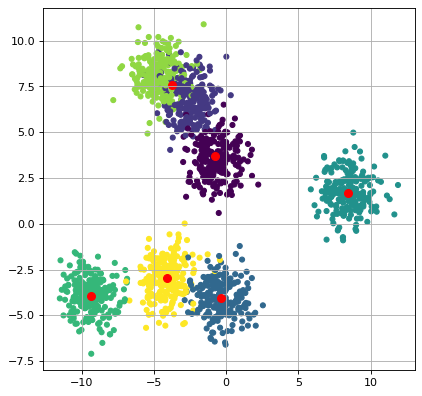

blobs dataset with shape: (1500, 2)
True K                  : 7
Estimated K             : 6
Silhouette score        : 0.6007775910724443
Random Index score      : 0.8087016683850571
Completeness score      : 0.9400163495949226
Mutual Information score: 0.8914812102653096


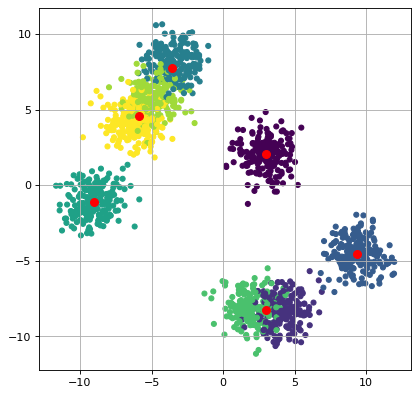

blobs dataset with shape: (1500, 2)
True K                  : 8
Estimated K             : 6
Silhouette score        : 0.634848372018918
Random Index score      : 0.7290367168642204
Completeness score      : 0.9465996458833548
Mutual Information score: 0.8651342788993138


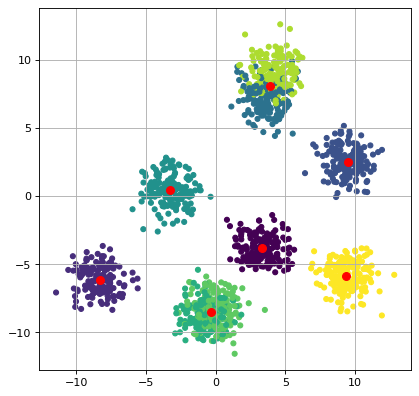

blobs dataset with shape: (1500, 2)
True K                  : 9
Estimated K             : 7
Silhouette score        : 0.7216003385307225
Random Index score      : 0.7901649346882461
Completeness score      : 1.0000000000000002
Mutual Information score: 0.9240927081244875


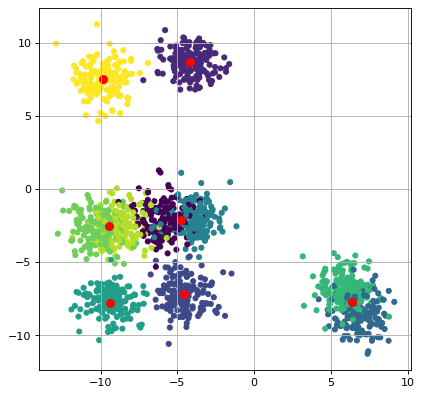

blobs dataset with shape: (1500, 2)
True K                  : 10
Estimated K             : 7
Silhouette score        : 0.6397395932920212
Random Index score      : 0.7019329859588307
Completeness score      : 0.9552906652431087
Mutual Information score: 0.8592999398032087


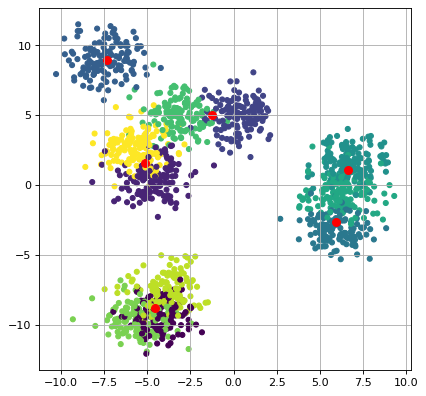

blobs dataset with shape: (1500, 2)
True K                  : 11
Estimated K             : 6
Silhouette score        : 0.5980840498094663
Random Index score      : 0.5526640489569905
Completeness score      : 0.929518655007718
Mutual Information score: 0.7790418457094522


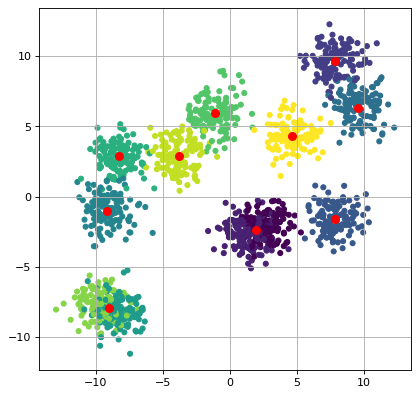

blobs dataset with shape: (1500, 2)
True K                  : 12
Estimated K             : 10
Silhouette score        : 0.6041186700613645
Random Index score      : 0.809994362792282
Completeness score      : 0.9627669578426427
Mutual Information score: 0.9148019806683311


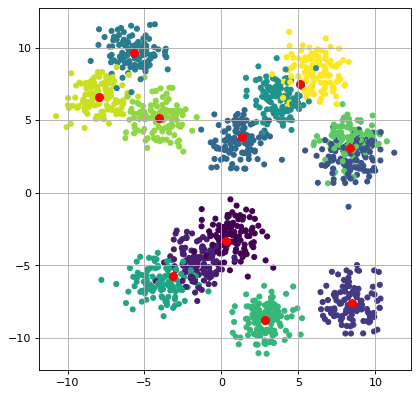

blobs dataset with shape: (1500, 2)
True K                  : 13
Estimated K             : 10
Silhouette score        : 0.5643825679631429
Random Index score      : 0.7490400363852423
Completeness score      : 0.9474205447215083
Mutual Information score: 0.8866313454284382


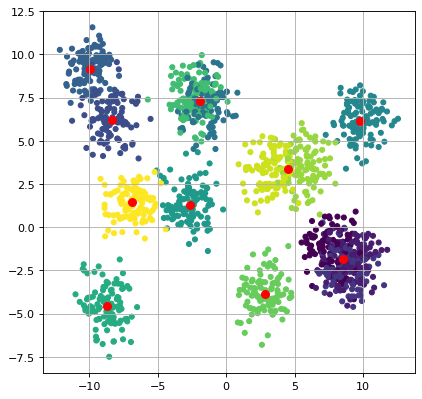

blobs dataset with shape: (1500, 2)
True K                  : 14
Estimated K             : 10
Silhouette score        : 0.6139652844695819
Random Index score      : 0.6862316310273966
Completeness score      : 0.9709750520696327
Mutual Information score: 0.88221626317326


In [4]:
# blob datasets
for num_centers in range(4, 15):
    data, labels = datasets.make_blobs(n_samples=1500, centers=num_centers, n_features=2, cluster_std=1)
    model = XMeans(K_max=20, identical_spherical_normal_distributions=False).fit(data)
    visualize(data, labels, model)
            
    # reference: https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
    print(f'blobs dataset with shape: {data.shape}')
    print(f'True K                  : {num_centers}')
    print(f'Estimated K             : {model.K}')
    print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
    print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
    print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
    print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')

## unnecessary split case

No split made. Please check data distribution or reduce K_init if necessary.


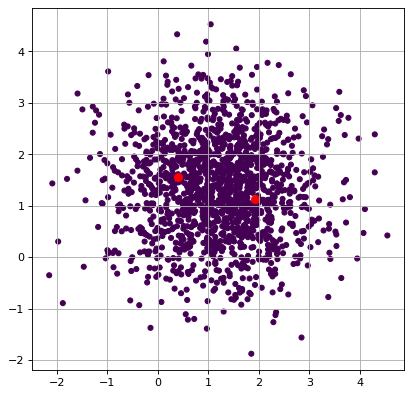

In [5]:
data, labels = datasets.make_blobs(n_samples=1500, centers=1, n_features=2, cluster_std=1)
model = XMeans(K_init=2, identical_spherical_normal_distributions=True).fit(data)
visualize(data, labels, model)

## high dimensional case

No split made. Please check data distribution or reduce K_init if necessary.


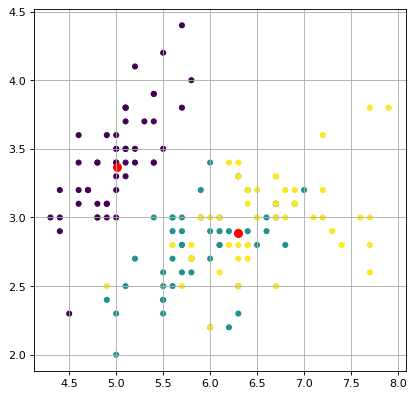

iris dataset with shape : (150, 4)
note that data is in 4 dimension and plot above is only a 2D snapshot
Silhouette score        : 0.681046169211746
Random Index score      : 0.5399218294207123
Completeness score      : 0.8835142349190769
Mutual Information score: 0.6538380713762779


In [6]:
# iris dataset
dataset = datasets.load_iris()
data = dataset.data
labels = dataset.target

model = XMeans(identical_spherical_normal_distributions=False).fit(data)
visualize(data, labels, model)

print(f'iris dataset with shape : {data.shape}')
print(f'note that data is in {data.shape[1]} dimension and plot above is only a 2D snapshot')
print(f'Silhouette score        : {metrics.silhouette_score(data, model.labels)}')
print(f'Random Index score      : {metrics.adjusted_rand_score(labels, model.labels)}')
print(f'Completeness score      : {metrics.completeness_score(labels, model.labels)}')
print(f'Mutual Information score: {metrics.adjusted_mutual_info_score(labels, model.labels)}')